In [ ]:
#Installation of Chromium, Chromium Driver and Selenium
%%shell

cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium


Executing: /tmp/apt-key-gpghome.JG7SGfaCLZ/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.wVrgUN5355/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.O2FJWoTHke/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
# Using Selenium and chrome webdriver as browser to run without a graphical user interface
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.headless = True

In [ ]:
#importing the Dependinces
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from google.colab import  drive
drive.mount('/drive')
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
from nltk.util import pr
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import string
import string
from time import sleep


Mounted at /drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Web-Scrapping of Flipkart reviews and running the loop over total 87 pages to capture all reviews
username=[]
rating=[]
review=[]
comment=[]
link=[]
#URL
url='https://www.flipkart.com/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&lid=LSTCOMFXEKMGNHZYFH9P56X45&marketplace=FLIPKART&q=macbook&store=6bo%2Fb5g&spotlightTagId=FkPickId_6bo%2Fb5g&srno=s_1_1&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&fm=search-autosuggest&iid=e2797581-f927-441c-9c4c-e578650f5d00.COMFXEKMGNHZYFH9.SEARCH&ppt=sp&ppn=sp&ssid=5qi1o0p9cg0000001685526899535&qH=864faee128623e2f'
driver=webdriver.Chrome('chromedriver',options=chrome_options)
driver.maximize_window()
driver.get(url)
r1=rq.get(url)
soup1=BeautifulSoup(r1.text,'html.parser')
driver.execute_script('window.scroll(0,2500)')
sleep(2)

for t in soup1.findAll('a',attrs={'href':re.compile("/product-reviews")}):
    q=t.get('href')
    link.append(q)
#print(link)
for i in link:
  #This LST... can be found in webpage
    if 'LSTCOMFXEKMGNHZYFH9P56X45' in i: 
        #print(i)
        aa=i
f_url=('https://www.flipkart.com'+str(i))
i=1
#As Reviews has 11 webpages loop for 11 applied
while i<=87:
    ss=driver.get(str(f_url)+"&page="+str(i))
    qq=driver.current_url
    r2=rq.get(qq)
    soup=BeautifulSoup(r2.text,'html.parser')

#Scraping Username
    for ur in soup.find_all('p',{'class':'_2sc7ZR _2V5EHH'}):
        aa=ur.get_text()
        username.append(aa)
#Scraping Rating
    for ra in soup.find_all('div',{'class':'_3LWZlK _1BLPMq'}):
        bb=ra.get_text()
        rating.append(bb)
#Scraping Review
    for re in soup.find_all('p',{'class':'_2-N8zT'}):
        cc=re.get_text()
        review.append(cc)    
#Scraping Comment
    for co in soup.find_all('div',{'class':'t-ZTKy'}):
        dd=co.get_text()
        comment.append(dd)
 
    sleep(1)
    i+=1
    
df=pd.DataFrame([username, rating, review, comment]).transpose()
df.columns = ["USERNAME", "RATING", "REVIEW", "COMMENT"]
#File will be saved to Drive
df.to_csv("/drive/My Drive/Colab_Data/Flipkart_Macbook_M1_Reviews.csv") 
df.shape

(510, 4)

In [ ]:
# Number of Null spaces
df.isnull().sum()

USERNAME     0
RATING      21
REVIEW       0
COMMENT      0
dtype: int64

In [ ]:
df.duplicated().sum()

4

In [ ]:
#Dropping null and duplicate rows
df=df.dropna()
df.drop_duplicates(keep="first")

,USERNAME,RATING,REVIEW,COMMENT
0,Nitish Sharma,4,Value-for-money,A bit expensive when we compare with today's ...
1,Kunal Kathe,5,Classy product,Fantastic value for money machine!! Absolute b...
2,shivam upadhyay,4,Very Good,If You are going to buy a laptop worth 85k go ...
3,hari,5,Terrific,The following is a detailed usage review.First...
4,shudhanshu shukla,5,Highly recommended,"The best you can get, looks and performance bo..."
...,...,...,...,...
484,Flipkart Customer,5,Terrific,It provides seemless performance. Worth of eve...
485,Flipkart Customer,5,Just wow!,Best and ultra portable device ❣️❤️🔥🔥🔥READ MORE
486,Gaurav Big-g,5,Simply awesome,Great product by Apple Must buy.READ MORE
487,Deval Raut,5,Worth every penny,Portable machine in the true sense. Worth ever...


In [ ]:
#check value of Stars
df['RATING'].value_counts()

5    428
4     49
3     12
Name: RATING, dtype: int64

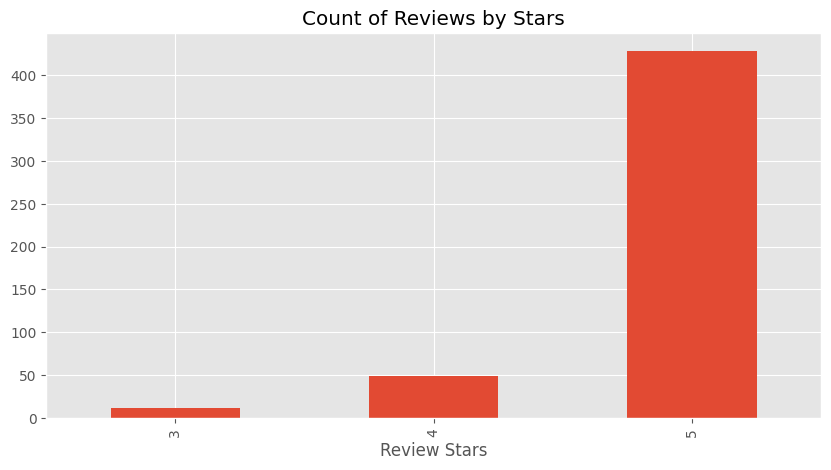

In [ ]:
#Quick EDA on Dataset
ax = df['RATING'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

<Axes: ylabel='RATING'>

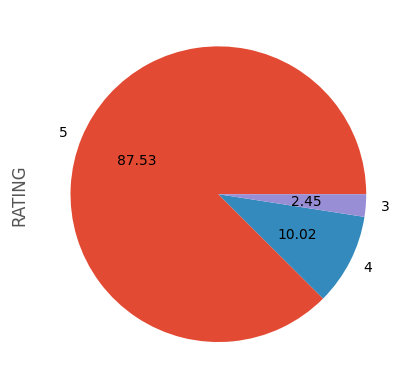

In [ ]:
df['RATING'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
Rating = df["RATING"].value_counts()
numbers = Rating.index
quantity = Rating.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

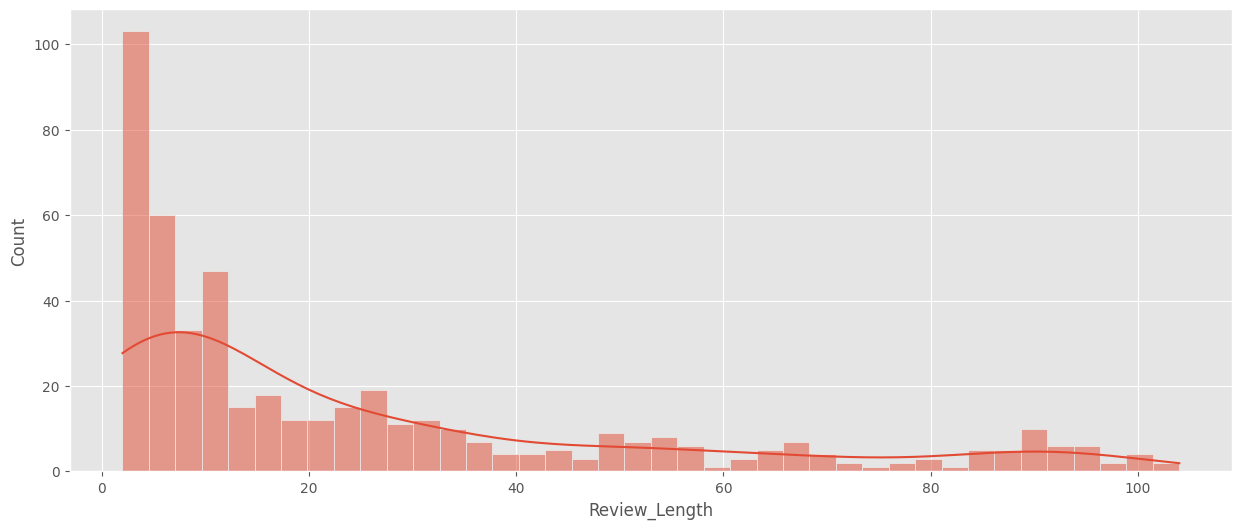

,USERNAME,RATING,REVIEW,COMMENT,Review_Length
0,Nitish Sharma,4,Value-for-money,A bit expensive when we compare with today's ...,90
1,Kunal Kathe,5,Classy product,Fantastic value for money machine!! Absolute b...,84
2,shivam upadhyay,4,Very Good,If You are going to buy a laptop worth 85k go ...,85
3,hari,5,Terrific,The following is a detailed usage review.First...,92
4,shudhanshu shukla,5,Highly recommended,"The best you can get, looks and performance bo...",65


In [ ]:
# Review length and count
df['Review_Length'] = df['COMMENT'].apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15,6))
sns.histplot(df['Review_Length'], bins = 40, kde = True, palette = 'hls')
plt.show()
df.head()

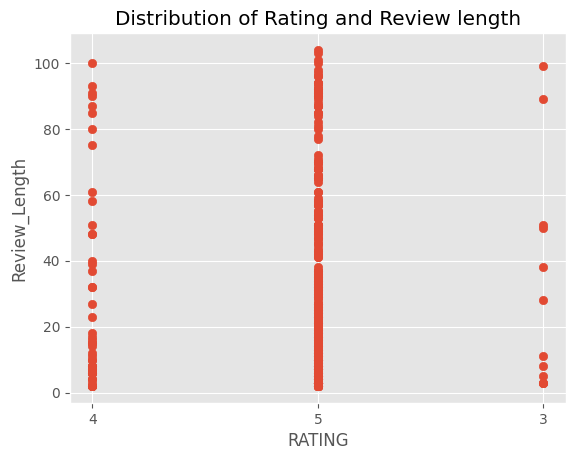

In [ ]:
# Detailing of Written Review 
plt.scatter(df['RATING'], df['Review_Length'])
plt.xlabel('RATING')
plt.ylabel('Review_Length')
plt.title('Distribution of Rating and Review length')
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Remove specific text
    specific_text = ['read']  # Add the specific text to remove
    for specific in specific_text:
        text = text.replace(specific, '')
    # Remove specific words
    specific_words = ['read','more']  # Add the specific words to remove
    words = [word for word in words if word not in specific_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text
df["COMMENT"] = df["COMMENT"].apply(clean_text)
df.head()

,USERNAME,RATING,REVIEW,COMMENT,Review_Length
0,Nitish Sharma,4,Value-for-money,bit expensive compare today intel th gen amd r...,90
1,Kunal Kathe,5,Classy product,fantastic value money machine absolute beast f...,84
2,shivam upadhyay,4,Very Good,going buy laptop worth k go itno one beat desi...,85
3,hari,5,Terrific,following detailed usage review first thank fl...,92
4,shudhanshu shukla,5,Highly recommended,best get look performance notch supreme batter...,65


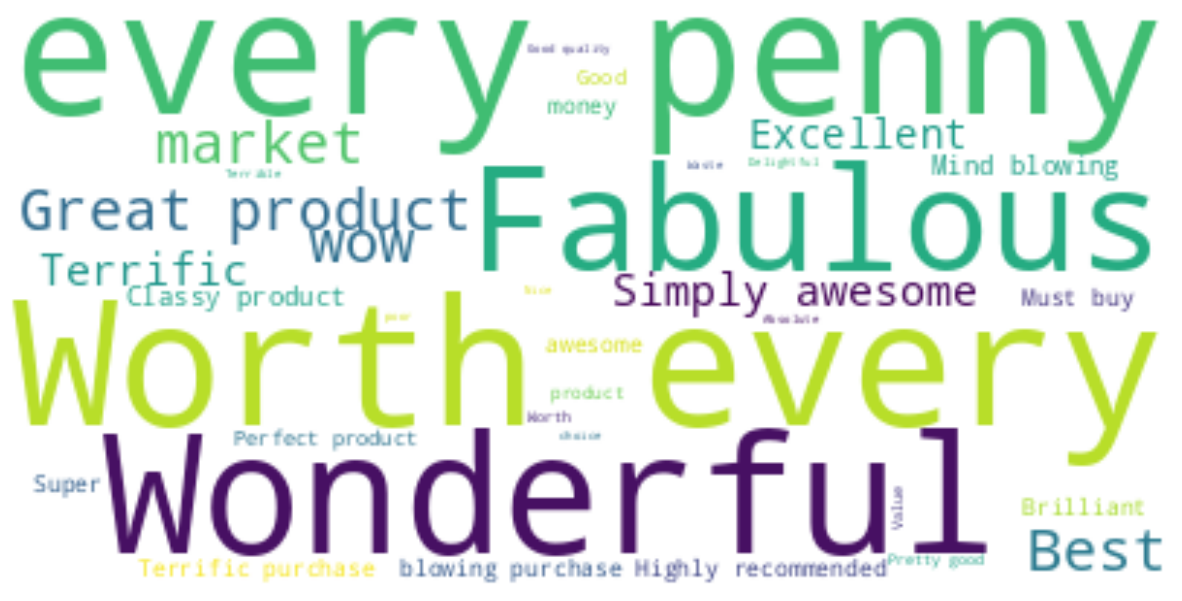

In [ ]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
#The labels column of the data contains the labels given by every reviewer
text = " ".join(i for i in df.REVIEW)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

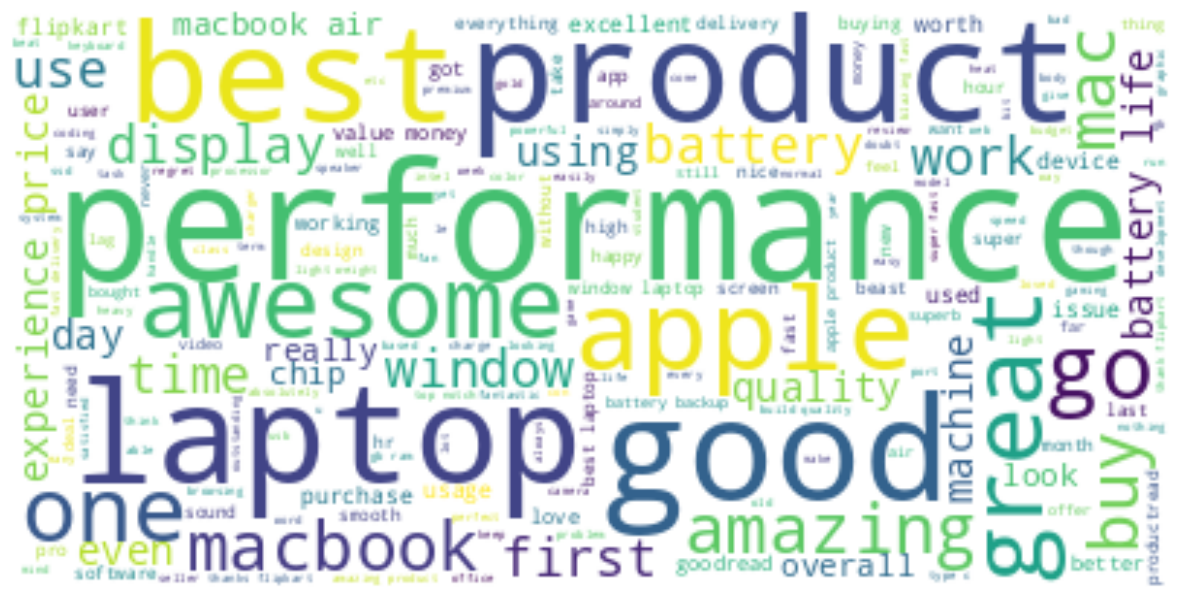

In [ ]:
#WordCloud of words from Comments column
text = " ".join(i for i in df.COMMENT)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white"
                     ).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

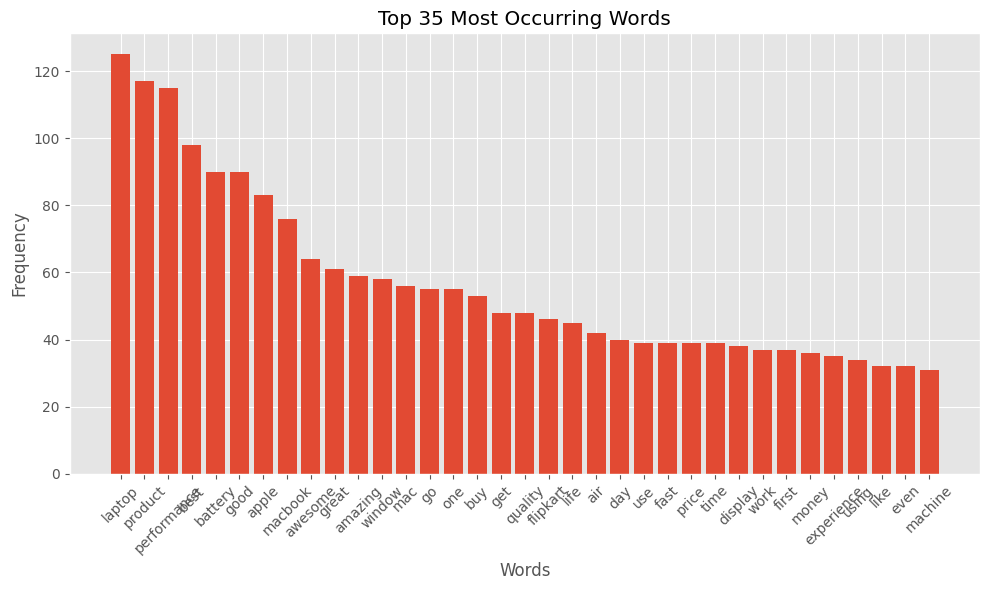

In [ ]:
from nltk.corpus import stopwords
all_reviews = ' '.join(df['COMMENT'])
tokens = word_tokenize(all_reviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens if word.lower() not in stop_words]
word_counts = Counter(filtered_words)

# Selecting the top n most recurring words
n = 35
top_words = word_counts.most_common(n)
words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]

# Bar Graph Plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Occurring Words'.format(n))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Vader Lexicon classification
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
df_vader=df.copy()
df_vader["Positive"]=[sia.polarity_scores(i)["pos"] for i in df["COMMENT"]]
df_vader["Negative"]=[sia.polarity_scores(i)["neg"] for i in df["COMMENT"]]
df_vader["Neutral"]=[sia.polarity_scores(i)["neu"] for i in df["COMMENT"]]
#df_vader=df[["USERNAME","RATING","REVIEW","COMMENT","Positive","Negative","Neutral",]]
df_vader['Sentiment'] = df_vader[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)

compound_scores = []

# Calculate the compound score for each review
for review in df_vader['COMMENT']:
  compound_scores.append(sia.polarity_scores(review)['compound'])
df_vader['compound'] = compound_scores
df_vader.head()


,USERNAME,RATING,REVIEW,COMMENT,Review_Length,Positive,Negative,Neutral,Sentiment,compound
0,Nitish Sharma,4,Value-for-money,bit expensive compare today intel th gen amd r...,90,0.060,0.109,0.832,Neutral,-0.3182
1,Kunal Kathe,5,Classy product,fantastic value money machine absolute beast f...,84,0.328,0.000,0.672,Neutral,0.9584
2,shivam upadhyay,4,Very Good,going buy laptop worth k go itno one beat desi...,85,0.246,0.000,0.754,Neutral,0.9191
3,hari,5,Terrific,following detailed usage review first thank fl...,92,0.231,0.000,0.769,Neutral,0.8779
4,shudhanshu shukla,5,Highly recommended,best get look performance notch supreme batter...,65,0.377,0.057,0.566,Neutral,0.9272


In [ ]:
# Sentiment Count
x=sum(df_vader["Positive"])
y=sum(df_vader["Negative"])
z=sum(df_vader["Neutral"])

def sentiment_score(a,b,c):
  if(a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")
sentiment_score(x,y,z)
print ("Positive: ", x)
print ("Negative: ", y)
print ("Neutral: ", z)

Neutral
Positive:  192.94699999999992
Negative:  18.640000000000008
Neutral:  277.40999999999997


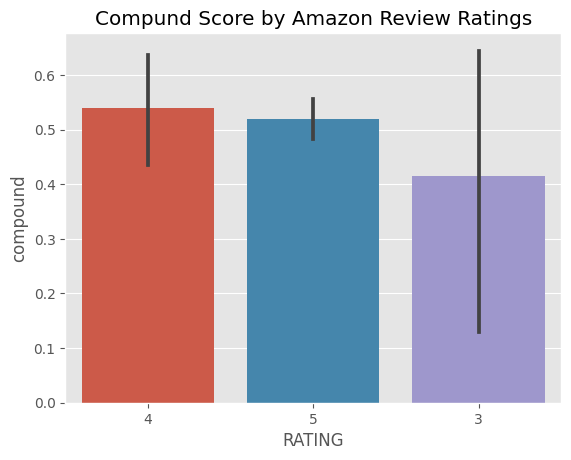

In [ ]:
# Created a bar plot to visualize the compound scores by Amazon review ratings
ax = sns.barplot(data=df_vader, x='RATING', y='compound')
ax.set_title('Compund Score by Amazon Review Ratings')
plt.show()

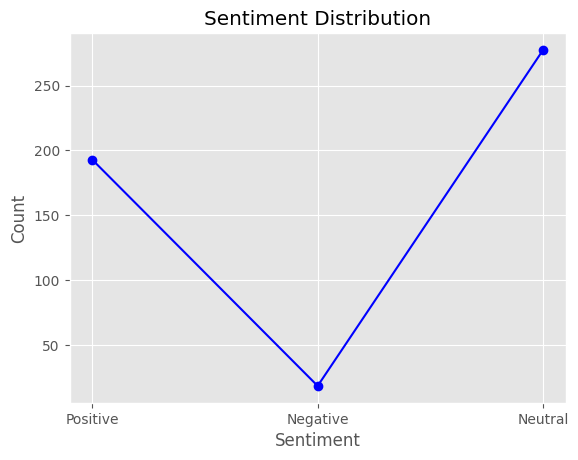

In [ ]:
# Calculated the count of each sentiment
sentiment_counts = df_vader[['Positive', 'Negative', 'Neutral']].sum()

# Created a list of sentiments and their counts
sentiments1 = ['Positive', 'Negative', 'Neutral']
counts = sentiment_counts.tolist()

# Created a line plot for sentiment counts
plt.plot(sentiments1, counts, marker='o', linestyle='-', color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df_vader['COMMENT']
Y = df_vader['RATING']
print(len(X), len(Y))
#loading CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)
print(X)

489 489
  (0, 139)	1
  (0, 476)	1
  (0, 269)	2
  (0, 1386)	1
  (0, 690)	1
  (0, 1357)	2
  (0, 561)	2
  (0, 50)	1
  (0, 1151)	1
  (0, 109)	1
  (0, 1498)	3
  (0, 726)	3
  (0, 1146)	1
  (0, 591)	1
  (0, 60)	1
  (0, 1355)	2
  (0, 937)	1
  (0, 975)	1
  (0, 502)	1
  (0, 134)	1
  (0, 900)	1
  (0, 1188)	1
  (0, 85)	1
  (0, 236)	1
  (0, 969)	1
  :	:
  (484, 975)	1
  (484, 1516)	1
  (484, 454)	1
  (484, 1074)	1
  (484, 967)	1
  (484, 1283)	1
  (484, 1184)	1
  (485, 129)	1
  (485, 1419)	1
  (485, 1011)	1
  (485, 373)	1
  (486, 60)	1
  (486, 192)	1
  (486, 1052)	1
  (486, 592)	1
  (486, 863)	1
  (487, 783)	1
  (487, 1516)	1
  (487, 1011)	1
  (487, 454)	1
  (487, 1405)	1
  (487, 1193)	1
  (487, 968)	1
  (488, 1102)	1
  (488, 582)	1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 1 2 2 2 2 1 2
 0 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 0 2 2 2 2 2
 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 1 2 0 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0]


In [ ]:
#spliting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape)

(327, 1537) (162, 1537) (327,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
#traing dataset accuracy score
train_test = lg.predict(X_train)
accuracy_score(train_test,Y_train)

0.963302752293578

In [ ]:
#test dataset accuracy score
test_data = lg.predict(X_test)
accuracy_score(test_data, Y_test)

0.8518518518518519

In [ ]:
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
preds = lg.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        20
           2       0.85      1.00      0.92       138

    accuracy                           0.85       162
   macro avg       0.28      0.33      0.31       162
weighted avg       0.73      0.85      0.78       162



In [ ]:
#using from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [ ]:
#model fit
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#traing dataset accuracy score
train_test = DT.predict(X_train)
accuracy_score(train_test,Y_train)

0.9877675840978594

In [ ]:
#test dataset accuracy score
test_data = DT.predict(X_test)
accuracy_score(test_data, Y_test)

0.808641975308642

In [ ]:
#classification report
preds = DT.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.12      0.05      0.07        20
           2       0.85      0.94      0.89       138

    accuracy                           0.81       162
   macro avg       0.32      0.33      0.32       162
weighted avg       0.74      0.81      0.77       162



In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
preds = nb.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        20
           2       0.85      0.97      0.91       138

    accuracy                           0.83       162
   macro avg       0.28      0.32      0.30       162
weighted avg       0.72      0.83      0.77       162



In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [ ]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ........................................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)

In [ ]:
grid_search.best_params_

{'alpha': 10}

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
# print(len(x_train), len(y_train))
# print(len(x_test), len(y_test))

In [ ]:
# print(confusion_matrix(y_test, y_pred_class))

[[  0   0   4]
 [  0   0  16]
 [  0   0 103]]


In [ ]:
# print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.84      1.00      0.91       103

    accuracy                           0.84       123
   macro avg       0.28      0.33      0.30       123
weighted avg       0.70      0.84      0.76       123

